## 합성곱 구현 프로젝트 과제

### 필요한 모듈 임포트

In [5]:
import numpy as np
import os
import keras

from keras.datasets import cifar10
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.utils import np_utils
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

### cifar10 이미지 로딩

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

print(X_train.shape, X_train.dtype)

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32
(50000, 32, 32, 3) uint8


### 이미지 시각화

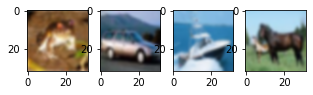

In [7]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

### 이미지 정규화 ( 스케일링 )

In [8]:
print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
    
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
    
X_train = newX_train
X_test = newX_test

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996
2.126789409516928


### 정답값 원핫 인코딩

In [10]:
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

### 모델 구현 및 훈련 - 재구현 필요

In [11]:
batchSize = 512                   #-- Training Batch Size
num_epochs = 10                   #-- Number of epochs for training   
learningRate= 0.01                #-- Learning rate for the network
img_rows = 32                     #-- input image dimensions
img_cols = 32 

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

model_cce = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs, shuffle=True, validation_data=(X_test, Y_test))

Epoch 1/10
98/98 [==============================] - 95s 974ms/step - loss: 1.6239 - accuracy: 0.4012 - val_loss: 1.3034 - val_accuracy: 0.5267
Epoch 2/10
98/98 [==============================] - 97s 989ms/step - loss: 1.1601 - accuracy: 0.5825 - val_loss: 1.0161 - val_accuracy: 0.6369
Epoch 3/10
98/98 [==============================] - 95s 971ms/step - loss: 0.9332 - accuracy: 0.6679 - val_loss: 0.9419 - val_accuracy: 0.6707
Epoch 4/10
98/98 [==============================] - 95s 974ms/step - loss: 0.7571 - accuracy: 0.7328 - val_loss: 0.8107 - val_accuracy: 0.7198
Epoch 5/10
98/98 [==============================] - 94s 963ms/step - loss: 0.6352 - accuracy: 0.7772 - val_loss: 0.7796 - val_accuracy: 0.7303
Epoch 6/10
98/98 [==============================] - 93s 954ms/step - loss: 0.5351 - accuracy: 0.8115 - val_loss: 0.7929 - val_accuracy: 0.7347
Epoch 7/10
98/98 [==============================] - 98s 1s/step - loss: 0.4481 - accuracy: 0.8418 - val_loss: 0.8151 - val_accuracy: 0.7353
Ep